# Time Series Decomposition

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


### Convertng month data from object to datetime

In [4]:
df['Month'] = pd.to_datetime(df['Month'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


### Add the month to index of dataframe

In [6]:
df.index = df['Month']
df.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [7]:
df = df.drop(labels=['Month'],axis=1)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
df.columns = ['nPass']
df.head()

,nPass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Visualize time series data

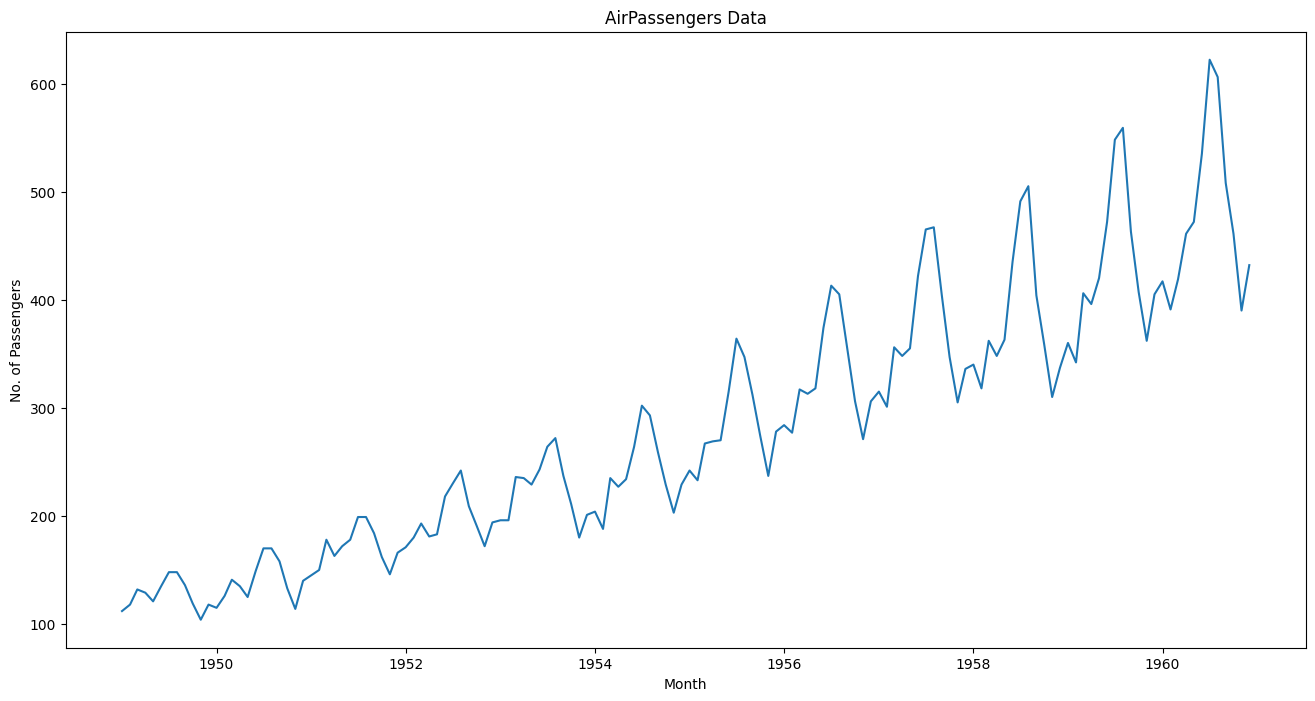

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df['nPass'])
plt.xlabel('Month')
plt.ylabel('No. of Passengers')
plt.title('AirPassengers Data')
plt.show()

### Time Series Decompostion

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
T = seasonal_decompose(df['nPass'],model='multiplicative')

## Trend Analysis

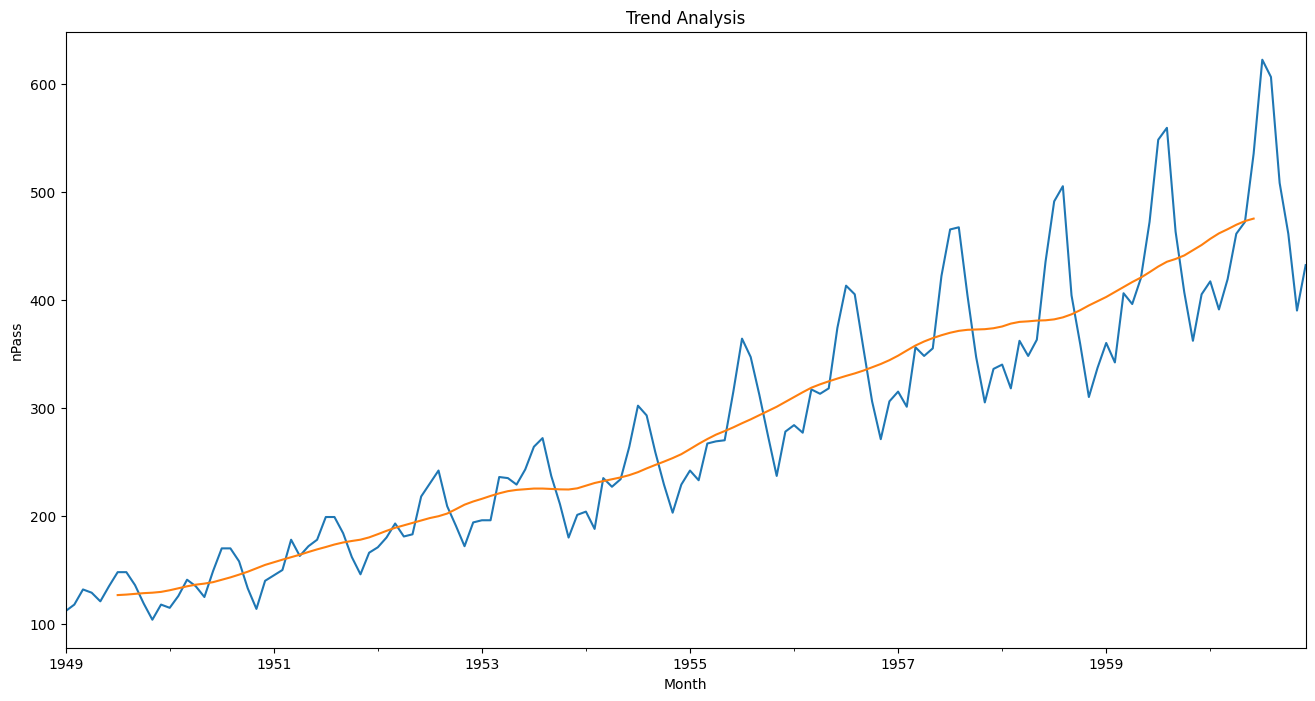

In [12]:
plt.figure(figsize=(16,8))
T.observed.plot()
T.trend.plot()
plt.xlabel('Month')
plt.ylabel('nPass')
plt.title('Trend Analysis')
plt.show()

### Seasonal Component

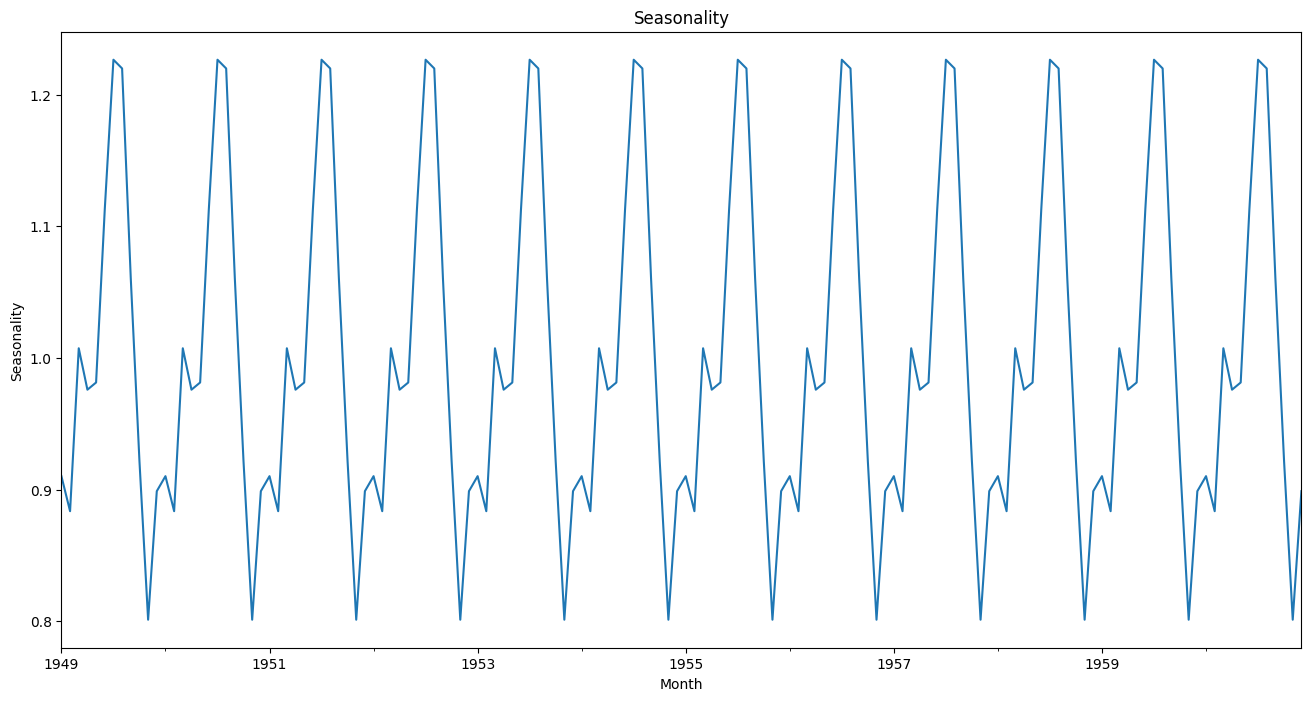

In [13]:
plt.figure(figsize=(16,8))
T.seasonal.plot()
plt.xlabel('Month')
plt.ylabel('Seasonality')
plt.title('Seasonality')
plt.show()

## Residuals

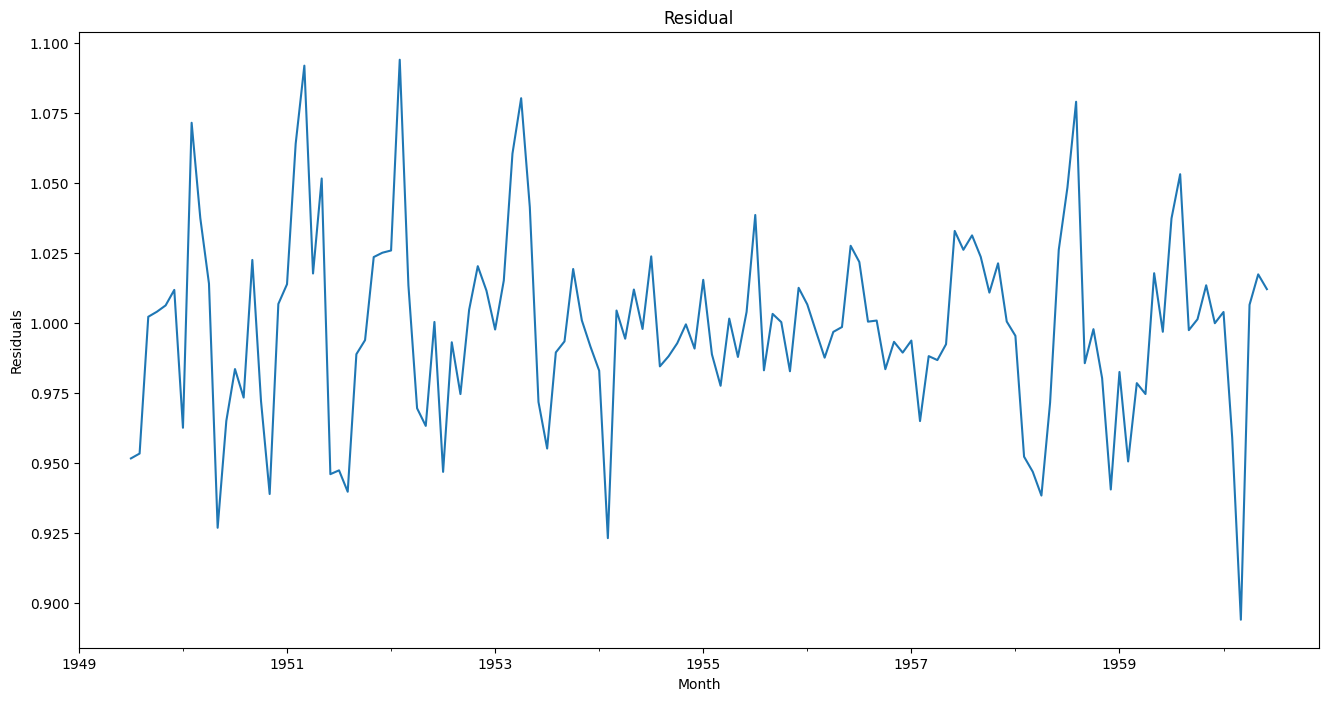

In [14]:
plt.figure(figsize=(16,8))
T.resid.plot()
plt.xlabel('Month')
plt.ylabel('Residuals')
plt.title('Residual')
plt.show()